### 1. Import Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 2. Import dataset, creating dataframe and displaying first five rows

In [2]:
df = pd.read_excel(r'C:/Users/Rohit Kachhal/Data Science Program/Internship/Final For Submission/Rating Prediction/data/Review_Rating.xlsx')
df.head()

,Unnamed: 0,Review_Title,Review_Text,Ratings
0,0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2.0 out of 5 stars
1,1,Overpriced,\n Overpriced for this mediocre product with ...,2.0 out of 5 stars
2,2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3.0 out of 5 stars
3,3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3.0 out of 5 stars
4,4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3.0 out of 5 stars


##### Outcome : 'Unnamed: 0' is useless column so drop it

In [3]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [4]:
df.head()

,Review_Title,Review_Text,Ratings
0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2.0 out of 5 stars
1,Overpriced,\n Overpriced for this mediocre product with ...,2.0 out of 5 stars
2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3.0 out of 5 stars
3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3.0 out of 5 stars
4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3.0 out of 5 stars


### 3.Data Frame Explore 

#### a). Dataframe Shape

In [5]:
df.shape

(114491, 3)

##### Outcome : There are 114491 rows and 3 columns in the dataframe.

#### b). Dataframe info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114491 entries, 0 to 114490
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Review_Title  98878 non-null   object
 1   Review_Text   100649 non-null  object
 2   Ratings       98880 non-null   object
dtypes: object(3)
memory usage: 2.6+ MB


##### Outcome:
* There are 3 columns in the dataframe.
* All 3 columns are of object type.
* There is null values in the dataframe.

#### c). Cross checking the null values

In [7]:
df.isnull().sum()

Review_Title    15613
Review_Text     13842
Ratings         15611
dtype: int64

##### Outcome : There are lot of null values in the dataframe.

#### d). Checking the unique values count in each column

In [8]:
print('The count of unique values in train dataframe is :\n',df.nunique())
print('\n ***************************************************\n')

The count of unique values in train dataframe is :
 Review_Title    41483
Review_Text     65101
Ratings            10
dtype: int64

 ***************************************************



#### e). Checking the unique values in each column

In [9]:
for col in df:
    print('The values count for '+col+' is :\n',df[col].value_counts())
    print('-----------------------------------------------------')
    print('-----------------------------------------------------')

The values count for Review_Title is :
 Wonderful                                                          1574
Good                                                               1376
Excellent                                                          1275
Great product                                                      1196
Classy product                                                     1139
                                                                   ... 
The connectivity is simply awesome !                                  1
All that Glitters Are Not Gold....ðŸ˜€                                1
No longevity: Forget Longevity there is no Mediumgevity either.       1
Good sound quality - Bad build and mic                                1
stereo effect normal                                                  1
Name: Review_Title, Length: 41483, dtype: int64
-----------------------------------------------------
-----------------------------------------------------
The values c

### 4. Data Preprocessing

#### a). Replacing null values

In [10]:
#Checking the mode of Review_Title column
df["Review_Title"].mode()

0    Wonderful
dtype: object

In [11]:
#Checking the mode of Review_Text column
df["Review_Text"].mode()

0    Good
dtype: object

In [12]:
#Checking the value counts of Ratings column
df.Ratings.value_counts()

5                     19085
5.0 out of 5 stars    16301
1.0 out of 5 stars    14598
4.0 out of 5 stars    14261
3.0 out of 5 stars    12313
2.0 out of 5 stars    10726
4                      6470
1                      2249
3                      2098
2                       779
Name: Ratings, dtype: int64

In [13]:
#Checking the mode
df["Ratings"].mode()

0    5
dtype: object

In [14]:
#Replacing naa values with there mode as all the columns are categorical
df["Review_Title"] = df["Review_Title"].fillna(df["Review_Title"].mode()[0])
df["Review_Text"] = df["Review_Text"].fillna(df["Review_Text"].mode()[0])
df["Ratings"] = df["Ratings"].fillna(df["Ratings"].mode()[0])

In [15]:
# Checking the null values again
df.isnull().sum()

Review_Title    0
Review_Text     0
Ratings         0
dtype: int64

#### b). Dealing with Ratings

In [16]:
# Checking the unique value count of target column
df['Ratings'].unique()

array(['2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', 5, '4.0 out of 5 stars', 4, 3, 1, 2],
      dtype=object)

In [17]:
# Replacing the string entries in target column
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')

In [18]:
# Checking the unique value count of target column again
df['Ratings'].unique()

array([2, 3, 1, 5, 4])

#### c). Combining 'Review_Title' and 'Review_Text' column in a single column 'Review'

In [19]:
df['Review'] = df['Review_Title'].map(str)+' '+df['Review_Text']
df.head()

,Review_Title,Review_Text,Ratings,Review
0,Think twice before going for it,\n &nbsp;Pros<br>-----<br>- Very light weight...,2,Think twice before going for it \n &nbsp;Pros...
1,Overpriced,\n Overpriced for this mediocre product with ...,2,Overpriced \n Overpriced for this mediocre pr...
2,Build quality is not as good as shown in the Ad,\n Did not meet expectations:<br>Takes signif...,3,Build quality is not as good as shown in the A...
3,Speed and Visuals makes this a power machine!,\n The speakers and sound quality are patheti...,3,Speed and Visuals makes this a power machine! ...
4,Overpriced and unreliable,\n For just i5 11th gen this laptop is way ov...,3,Overpriced and unreliable \n For just i5 11th...


#### d). Dropping 'Review_Title' and 'Review_Text' column from dataframe

In [20]:
df.drop(columns='Review_Title',axis=1,inplace=True)
df.drop(columns='Review_Text',axis=1,inplace=True)
df.head()

,Ratings,Review
0,2,Think twice before going for it \n &nbsp;Pros...
1,2,Overpriced \n Overpriced for this mediocre pr...
2,3,Build quality is not as good as shown in the A...
3,3,Speed and Visuals makes this a power machine! ...
4,3,Overpriced and unreliable \n For just i5 11th...


#### e). Looking the text in 'Review'

In [21]:
df['Review'][0]

"Think twice before going for it \n  &nbsp;Pros<br>-----<br>- Very light weight<br>- Screen brightness and clarity is awesome<br><br>Cons<br>------<br>- Speaker quality is horrible. Cannot use for calls at all. Crackling noise takes you to vinyl days.<br>- Body is not sturdy. The piece I received was slightly bent at the base, making the laptop wobble when I type.<br>- The bottom screw was hanging out with the thread gone due to incorrect tightening (so much for Japanese craftmanship)<br><br>Recommend to not purchase. It's not worth at this price point.\n"

In [22]:
df['Review'][1]

'Overpriced \n  Overpriced for this mediocre product with no brand value, better to check out other products in reputed brands like dell, Hp, Asus\n'

In [23]:
df['Review'][2]

"Build quality is not as good as shown in the Ad \n  Did not meet expectations:<br>Takes significant time to start since it first display logo of fijustu.<br><br>The material around touch pad feels weak. This is where you would hold the device in your hands. Feels like it can break easily.<br><br>Camera quality is poor. Also the physical camera shutter is very difficult to use and feels cheap.<br><br>There are no support assistantance application available.<br><br>You need to register for warrenty. Website is very confusing. You won't find your device easily.<br><br>Faced a glitch while using MS office 19 later it go resolved.<br><br>If it is placed on mattress and put on charging, fan would make a lot of noise and laptop would shutdown abruptly. It think there is problem with ventilation.<br><br>Just by opening single chrome window, 4 GB of ram is utilised and cooling fan starts working heavily.<br><br>The sound quality is poor.<br><br>Best thing is it very light.<br><br>I regret not 

#### f). Text Processing

In [24]:
#importing nltk libraries
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import FreqDist

#### Defining a function to replace some of the words to their full form, removing urls and some unwanted text 

In [25]:
def decon(Text):
    Text = re.sub(r"won't", "will not", Text)
    Text = re.sub(r"don’t", "do not", Text)
    Text = re.sub(r"can't", "can not", Text)
    Text = re.sub(r"im ", "i am", Text)
    Text = re.sub(r"yo ", "you ",Text)
    Text = re.sub(r"doesn’t", "does not",Text)
    Text = re.sub(r"n\'t", " not", Text)
    Text = re.sub(r"\'re", " are", Text)
    Text = re.sub(r"\'s", " is", Text)
    Text = re.sub(r"\'d", " would", Text)
    Text = re.sub(r"\'ll", " will", Text)
    Text = re.sub(r"\'t", " not", Text)
    Text = re.sub(r"\'ve", " have", Text)
    Text = re.sub(r"\'m", " am", Text)
    Text = re.sub(r"<br>", " ", Text)
    Text = re.sub(r'http\S+', '', Text) #removing urls
    return Text


# Changing all words to there Lowercase
df['Review'] = df['Review'].apply(lambda x : x.lower())

df['Review'] = df['Review'].apply(lambda x : decon(x))

# Removing punctuations
df['Review'] = df['Review'].str.replace('[^\w\s]','')
df['Review'] = df['Review'].str.replace('\n',' ')

####  Looking the text in 'Review' again

In [26]:
df['Review'][0]

'think twice before going for it    nbsppros   very light weight  screen brightness and clarity is awesome  cons   speaker quality is horrible cannot use for calls at all crackling noise takes you to vinyl days  body is not sturdy the piece i received was slightly bent at the base making the laptop wobble when i type  the bottom screw was hanging out with the thread gone due to incorrect tightening so much for japanese craftmanship  recommend to not purchase it is not worth at this price point '

In [27]:
df['Review'][1]

'overpriced    overpriced for this mediocre product with no brand value better to check out other products in reputed brands like dell hp asus '

In [28]:
df['Review'][2]

'build quality is not as good as shown in the ad    did not meet expectations takes significant time to start since it first display logo of fijustu  the material around touch pad feels weak this is where you would hold the device in your hands feels like it can break easily  camera quality is poor also the physical camera shutter is very difficult to use and feels cheap  there are no support assistantance application available  you need to register for warrenty website is very confusing you will not find your device easily  faced a glitch while using ms office 19 later it go resolved  if it is placed on mattress and put on charging fan would make a lot of noise and laptop would shutdown abruptly it think there is problem with ventilation  just by opening single chrome window 4 gb of ram is utilised and cooling fan starts working heavily  the sound quality is poor  best thing is it very light  i regret not going for lg gram  also i have no idea where are their service centres when i re

#### Removing StopWords:

In [29]:
sw = stopwords.words('english')
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))

#### Checking Text again

In [30]:
df['Review'][0]

'think twice going nbsppros light weight screen brightness clarity awesome cons speaker quality horrible cannot use calls crackling noise takes vinyl days body sturdy piece received slightly bent base making laptop wobble type bottom screw hanging thread gone due incorrect tightening much japanese craftmanship recommend purchase worth price point'

In [31]:
df['Review'][1]

'overpriced overpriced mediocre product brand value better check products reputed brands like dell hp asus'

In [32]:
df['Review'][2]

'build quality good shown ad meet expectations takes significant time start since first display logo fijustu material around touch pad feels weak would hold device hands feels like break easily camera quality poor also physical camera shutter difficult use feels cheap support assistantance application available need register warrenty website confusing find device easily faced glitch using ms office 19 later go resolved placed mattress put charging fan would make lot noise laptop would shutdown abruptly think problem ventilation opening single chrome window 4 gb ram utilised cooling fan starts working heavily sound quality poor best thing light regret going lg gram also idea service centres registered warranty got successful confirmation message lenovo'

#### g). Lemmatization

#### Initialising lemmatizer

In [33]:
lemmatizer = nltk.stem.WordNetLemmatizer()

#### Defining function to convert nltk tag to wordnet tags

In [34]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

#### defining function to lemmatize our text

In [35]:
def lem_sen(Sentence):
    
    #tokenize the sentence & find the pos tag
    nltk_tag = nltk.pos_tag(nltk.word_tokenize(Sentence))
    
    #tuple of (token, wordnet_tag)
    wordnet_tag = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tag)
    lem_sen = []
    for word, tag in wordnet_tag:
        if tag is None:
            lem_sen.append(word)
        else:
            lem_sen.append(lemmatizer.lemmatize(word,tag))
    return " ".join(lem_sen)

In [36]:
df['Review'] = df['Review'].apply(lambda x : lem_sen(x))

#### Checking Text again

In [37]:
df['Review'][0]

'think twice go nbsppros light weight screen brightness clarity awesome con speaker quality horrible can not use call crackle noise take vinyl day body sturdy piece receive slightly bent base make laptop wobble type bottom screw hang thread go due incorrect tighten much japanese craftmanship recommend purchase worth price point'

In [38]:
df['Review'][1]

'overprice overpriced mediocre product brand value well check product repute brand like dell hp asus'

In [39]:
df['Review'][2]

'build quality good show ad meet expectation take significant time start since first display logo fijustu material around touch pad feel weak would hold device hand feel like break easily camera quality poor also physical camera shutter difficult use feel cheap support assistantance application available need register warrenty website confuse find device easily face glitch use ms office 19 later go resolve placed mattress put charge fan would make lot noise laptop would shutdown abruptly think problem ventilation open single chrome window 4 gb ram utilised cooling fan start work heavily sound quality poor best thing light regret go lg gram also idea service centre register warranty get successful confirmation message lenovo'

#### h). Text Normalization - Standardization

#### Noise removal

In [40]:
def scrab_word(Text):
    
    #remove html markup
    Text = re.sub("(<.*?>)", "", Text)
    
    #remove non-ascii and digits
    Text = re.sub("(\\W)", " ", Text)
    Text = re.sub("(\\d)", "", Text)
    
    #remove white space
    Text = Text.strip()
    return Text

In [41]:
df['Review'] = df['Review'].apply(lambda x : scrab_word(x))

#### Checking Text again

In [42]:
df['Review'][0]

'think twice go nbsppros light weight screen brightness clarity awesome con speaker quality horrible can not use call crackle noise take vinyl day body sturdy piece receive slightly bent base make laptop wobble type bottom screw hang thread go due incorrect tighten much japanese craftmanship recommend purchase worth price point'

In [43]:
df['Review'][1]

'overprice overpriced mediocre product brand value well check product repute brand like dell hp asus'

In [44]:
df['Review'][2]

'build quality good show ad meet expectation take significant time start since first display logo fijustu material around touch pad feel weak would hold device hand feel like break easily camera quality poor also physical camera shutter difficult use feel cheap support assistantance application available need register warrenty website confuse find device easily face glitch use ms office  later go resolve placed mattress put charge fan would make lot noise laptop would shutdown abruptly think problem ventilation open single chrome window  gb ram utilised cooling fan start work heavily sound quality poor best thing light regret go lg gram also idea service centre register warranty get successful confirmation message lenovo'

#### i). Word Count in 'Review'

#### Creating a new column for word counts in the 'Review' column

In [45]:
df['Word_Count'] = df['Review'].apply(lambda x: len(str(x).split(' ')))
df[['Word_Count','Review']].head()

,Word_Count,Review
0,50,think twice go nbsppros light weight screen br...
1,15,overprice overpriced mediocre product brand va...
2,112,build quality good show ad meet expectation ta...
3,16,speed visuals make power machine speaker sound...
4,29,overprice unreliable i th gen laptop way overp...


#### Visualize the word count of Review

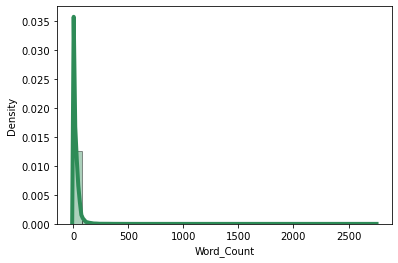

In [46]:
sns.distplot(df['Word_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'SeaGreen',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

#### j). Character Count in 'Review'

#### Creating a new column for character counts in the 'Review' column

In [47]:
df['Character_Count'] = df['Review'].str.len()
df[['Character_Count','Review']].head()

,Character_Count,Review
0,328,think twice go nbsppros light weight screen br...
1,99,overprice overpriced mediocre product brand va...
2,729,build quality good show ad meet expectation ta...
3,114,speed visuals make power machine speaker sound...
4,190,overprice unreliable i th gen laptop way overp...


#### Visualize the character count of Review

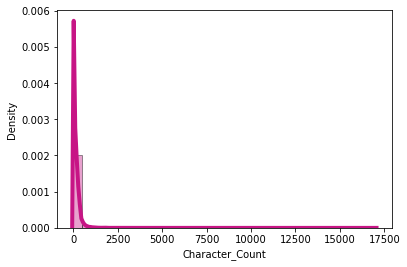

In [48]:
sns.distplot(df['Character_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'MediumVioletRed',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

#### k). Removing Outliers

In [49]:
#Checking the shape of the dataset
df.shape

(114491, 4)

In [50]:
# Applying zscore to remove outliers
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['Word_Count']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(112956, 4)

##### Outcome : The loss of data after removing outliers is 1.34% which is very less and acceptable.

#### Visualize the word count of Review again

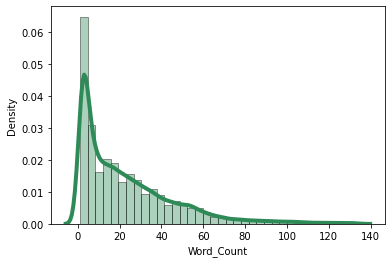

In [51]:
sns.distplot(df['Word_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'SeaGreen',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

#### Visualize the character count of Review again

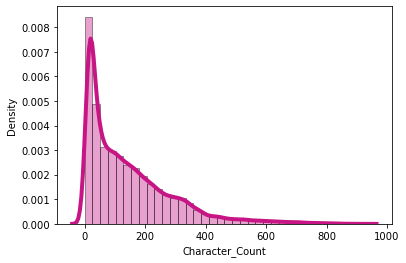

In [52]:
sns.distplot(df['Character_Count'], hist = True, kde = True,
            bins = int(180/5), color = 'MediumVioletRed',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()

#### l). Top 10 most frequently occuring words:

In [53]:
#function to plot most frequent terms
def frequently_word(x, terms = 10):
    words = ' '.join([text for text in x])
    words = words.split()
    fdist = FreqDist(words)
    df_word = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    
    #selecting top 10 most frequently word
    d = df_word.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

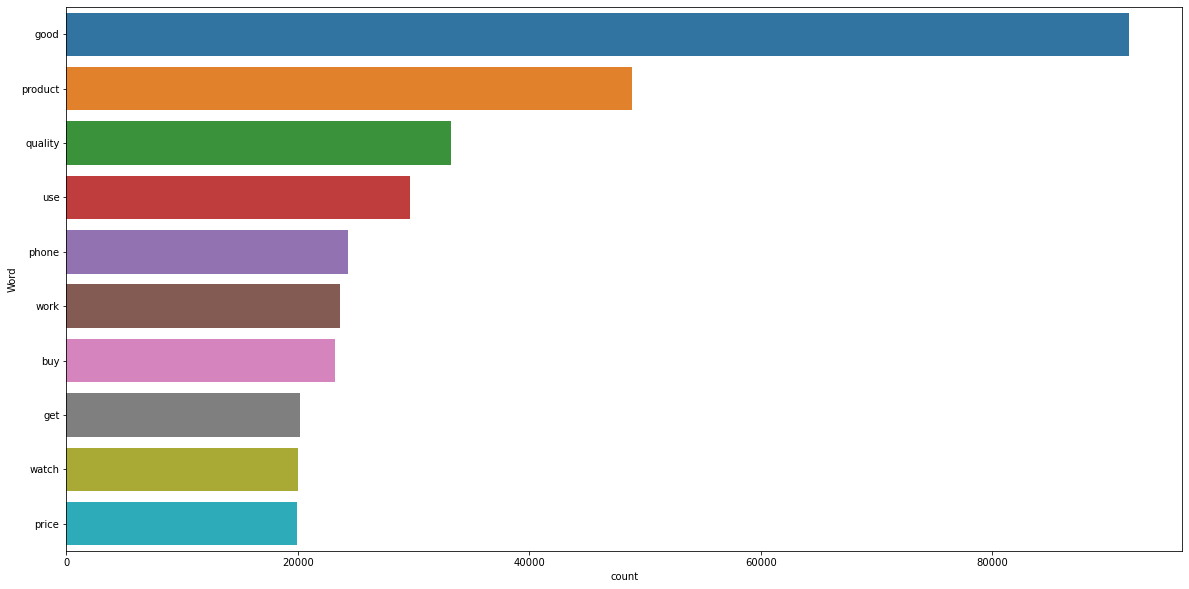

In [54]:
frequently_word(df['Review'])

#### m). Top 10 rare words:

In [55]:
#function to plot least frequent terms
def rare_word(x, terms = 10):
    words = ' '.join([text for text in x])
    words = words.split()
    fdist = FreqDist(words)
    df_word = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    
    #selecting top 10 rare words
    d = df_word.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

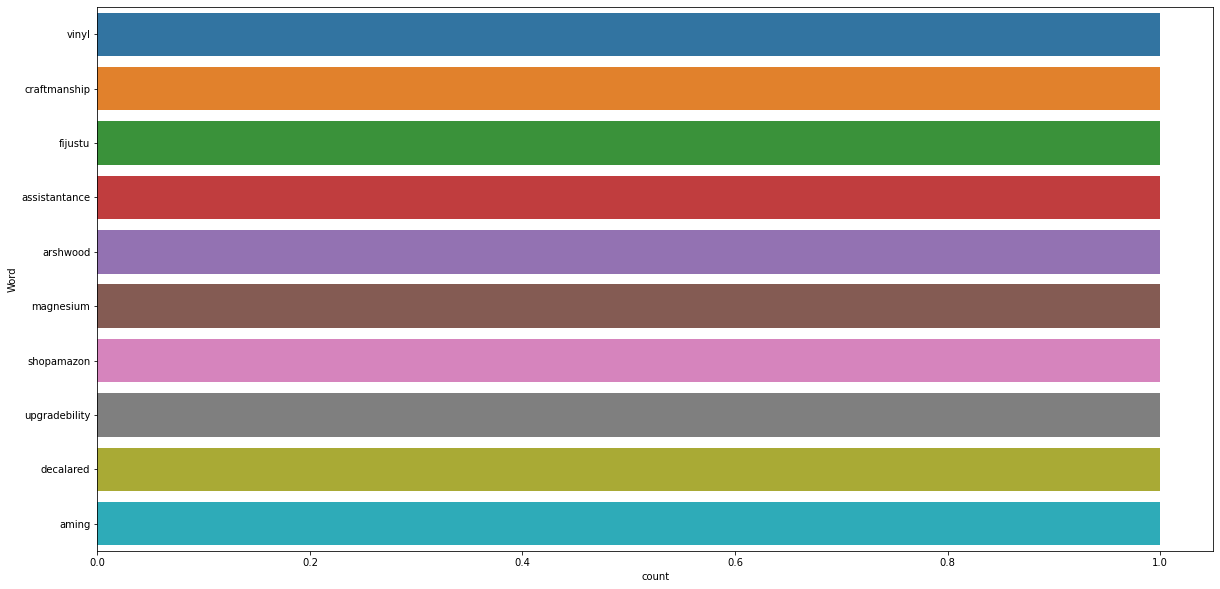

In [56]:
rare_word(df['Review'])

#### n). Word Cloud

In [57]:
from wordcloud import WordCloud, STOPWORDS
stop_word = set(STOPWORDS)
def show_word_cloud(data, title = None):
    word_cloud = WordCloud(
                    background_color='white',
                    stopwords = stop_word,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(word_cloud)
    plt.show()

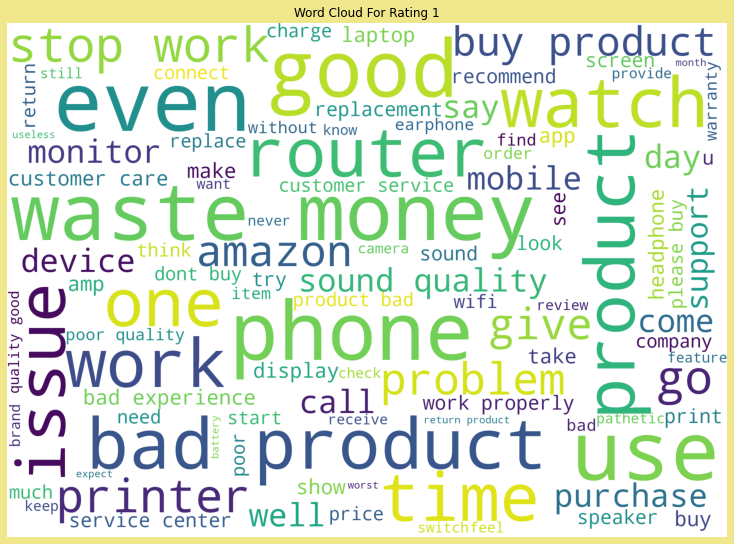

In [58]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stop_word,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='Khaki')
plt.title('Word Cloud For Rating 1')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

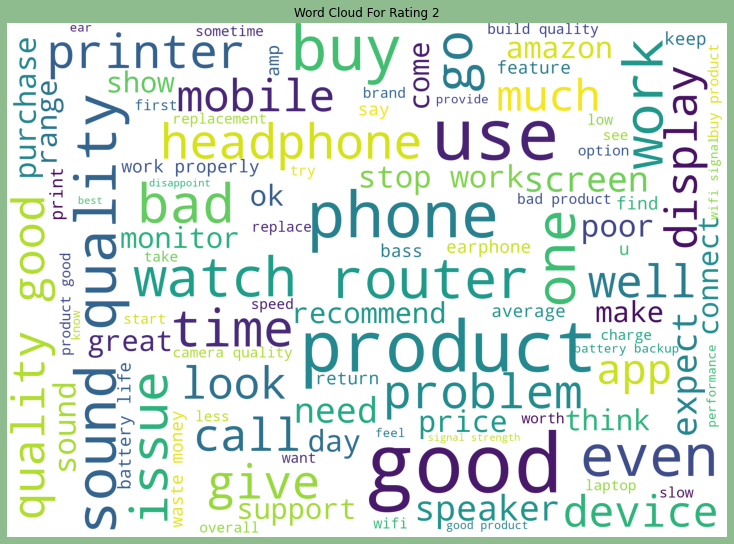

In [59]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stop_word,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='DarkSeaGreen')
plt.title('Word Cloud For Rating 2')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

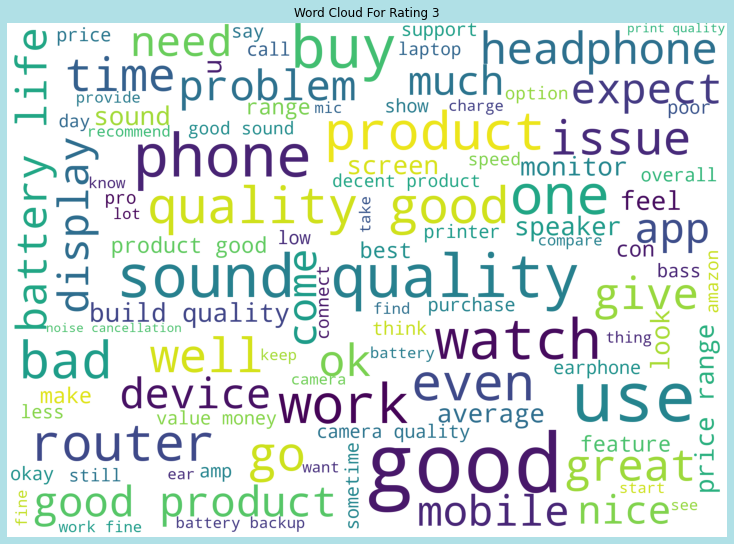

In [60]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stop_word,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='PowderBlue')
plt.title('Word Cloud For Rating 3')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

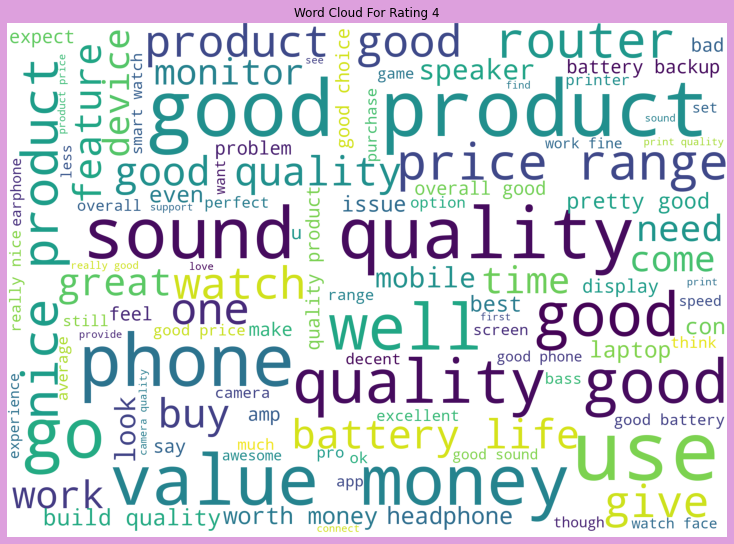

In [61]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stop_word,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='Plum')
plt.title('Word Cloud For Rating 4')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

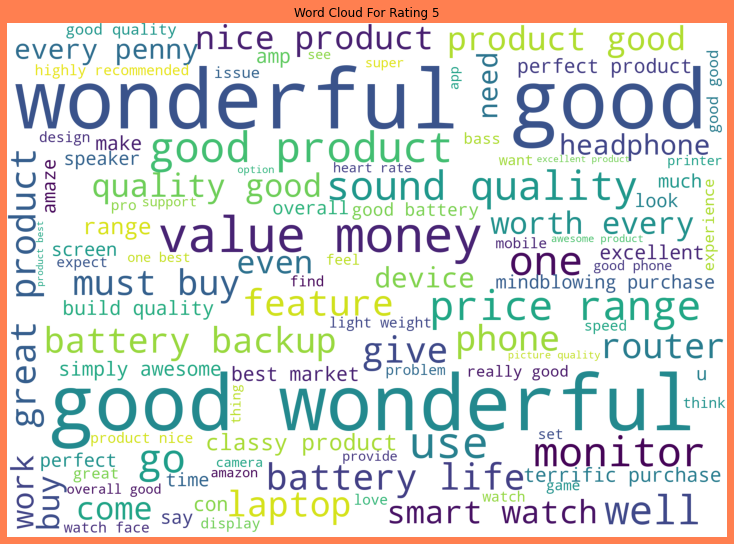

In [62]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df1=df['Review'][df['Ratings']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stop_word,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='Coral')
plt.title('Word Cloud For Rating 5')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

5    50238
4    20373
1    16687
3    14258
2    11400
Name: Ratings, dtype: int64


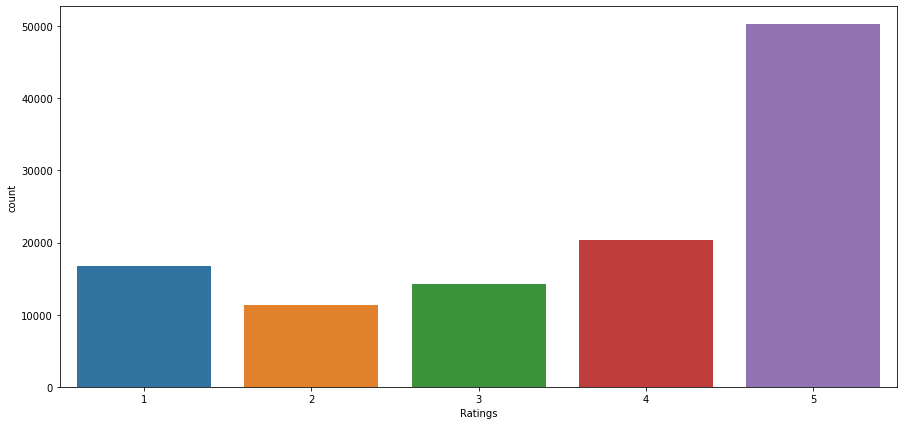

In [63]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df['Ratings'])
print(df.Ratings.value_counts())
plt.show()

### 5. Selecting Review_Rating as y as dependent & Review as X as independent variable

In [64]:
X = df['Review']
y = df['Ratings']

### 6. Converting text data into vectors using Tfidf Vectorizer

In [65]:
#using the n_gram tfidf vectorizer(Word vectors)
from sklearn.feature_extraction.text import TfidfVectorizer
word_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'word',
                                token_pattern = r'\w{1,}',
                                stop_words = 'english',
                                ngram_range = (1,3),
                                max_features = 100000)
word_vectorizer.fit(X)
train_word_features = word_vectorizer.transform(X)

#Character vectorizer
char_vectorizer = TfidfVectorizer(
                                sublinear_tf = True,
                                strip_accents = 'unicode',
                                analyzer = 'char',
                                stop_words = 'english',
                                ngram_range = (2,6),
                                max_features = 50000)
char_vectorizer.fit(X)
train_char_features = char_vectorizer.transform(X)

In [66]:
# Combined both word vectors and character vectors as input for our model
from scipy.sparse import hstack
train_features = hstack([train_char_features,train_word_features])

### 7. Split dataset using train_test_split

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,plot_roc_curve,confusion_matrix

In [68]:
state = 42
x_train, X_test, Y_train, y_test = train_test_split(train_features, y, test_size = 0.30, random_state = state)

# Lets check the shapes of traning and test data
print("x_train", x_train.shape)
print("x_test", X_test.shape)
print("y_train", Y_train.shape)
print("y_test", y_test.shape)

x_train (79069, 150000)
x_test (33887, 150000)
y_train (79069,)
y_test (33887,)


In [69]:
y.value_counts()

5    50238
4    20373
1    16687
3    14258
2    11400
Name: Ratings, dtype: int64

In [70]:
#Checking the number of classes before fit
from collections import Counter
print("The number of classes before fit{}".format(Counter(Y_train)))

The number of classes before fitCounter({5: 35153, 4: 14226, 1: 11665, 3: 9984, 2: 8041})


##### Outcome : So we have maximum count 35153 for 5 rating hence will over sample mannually all the ratings to the mark 35153.

In [71]:
# Oversample and plot imbalanced dataset with SMOTE
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# transforming the dataset
os=SMOTE(sampling_strategy = {1: 35153, 2: 35153, 3: 35153, 4: 35153, 5: 35153})
X_train,y_train=os.fit_resample(x_train,Y_train)

print("The number of classes before fit{}".format(Counter(Y_train)))
print("The number of classes after fit {}".format(Counter(y_train)))

The number of classes before fitCounter({5: 35153, 4: 14226, 1: 11665, 3: 9984, 2: 8041})
The number of classes after fit Counter({4: 35153, 5: 35153, 3: 35153, 1: 35153, 2: 35153})


### 8. Initiate our model

In [72]:
from sklearn.model_selection import cross_val_score 

#### a) Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lg =LogisticRegression()
lg.fit(X_train,y_train)
lg_pred = lg.predict(X_test)
lg_accuracy = accuracy_score(y_test,lg_pred)
lg_cf = classification_report(y_test,lg_pred)
lg_cm = confusion_matrix(y_test,lg_pred)
lg_train_score = lg.score(X_train,y_train)
lg_test_score = lg.score(X_test,y_test)

print('Logistic Regression')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',lg_train_score)
print('The Score on test set is    :',lg_test_score)
print('The Accuracy on test set is :',lg_accuracy)
print('The Classification report is :\n',lg_cf)
print('The Confusion matrix is :\n',lg_cm)
print('\n------------------------------------------------------------------')

Logistic Regression
------------------------------------------------------------------

The Score on train set is   : 0.8464313145392997
The Score on test set is    : 0.7339392687461268
The Accuracy on test set is : 0.7339392687461268
The Classification report is :
               precision    recall  f1-score   support

           1       0.71      0.77      0.74      5022
           2       0.49      0.51      0.50      3359
           3       0.56      0.50      0.53      4274
           4       0.61      0.69      0.65      6147
           5       0.91      0.86      0.88     15085

    accuracy                           0.73     33887
   macro avg       0.66      0.66      0.66     33887
weighted avg       0.74      0.73      0.74     33887

The Confusion matrix is :
 [[ 3854   709   266   125    68]
 [  815  1697   522   246    79]
 [  456   665  2116   803   234]
 [  145   235   571  4226   970]
 [  137   151   309  1510 12978]]

--------------------------------------------------

#### b). Decision Tree Classifier

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_cf = classification_report(y_test,dt_pred)
dt_cm = confusion_matrix(y_test,dt_pred)
dt_train_score = dt.score(X_train,y_train)
dt_test_score = dt.score(X_test,y_test)

print('Decision Tree Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',dt_train_score)
print('The Score on test set is    :',dt_test_score)
print('The Accuracy on test set is :',dt_accuracy)
print('The Classification report is :\n',dt_cf)
print('The Confusion matrix is :\n',dt_cm)
print('\n------------------------------------------------------------------')

Decision Tree Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9929792620828948
The Score on test set is    : 0.7071443326349337
The Accuracy on test set is : 0.7071443326349337
The Classification report is :
               precision    recall  f1-score   support

           1       0.68      0.66      0.67      5022
           2       0.48      0.52      0.50      3359
           3       0.54      0.55      0.54      4274
           4       0.61      0.63      0.62      6147
           5       0.87      0.84      0.85     15085

    accuracy                           0.71     33887
   macro avg       0.63      0.64      0.64     33887
weighted avg       0.71      0.71      0.71     33887

The Confusion matrix is :
 [[ 3339   718   435   290   240]
 [  654  1732   410   318   245]
 [  431   507  2347   603   386]
 [  248   354   609  3901  1035]
 [  270   300   575  1296 12644]]

---------------------------------------------

#### c) Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
rc_pred = rc.predict(X_test)
rc_accuracy = accuracy_score(y_test,rc_pred)
rc_cf = classification_report(y_test,rc_pred)
rc_cm = confusion_matrix(y_test,rc_pred)
rc_train_score = rc.score(X_train,y_train)
rc_test_score = rc.score(X_test,y_test)

print('Random Forest Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',rc_train_score)
print('The Score on test set is    :',rc_test_score)
print('The Accuracy on test set is :',rc_accuracy)
print('The Classification report is :\n',rc_cf)
print('The Confusion matrix is :\n',rc_cm)
print('\n------------------------------------------------------------------')

Random Forest Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9929792620828948
The Score on test set is    : 0.7669902912621359
The Accuracy on test set is : 0.7669902912621359
The Classification report is :
               precision    recall  f1-score   support

           1       0.71      0.84      0.77      5022
           2       0.63      0.52      0.57      3359
           3       0.66      0.54      0.59      4274
           4       0.62      0.75      0.68      6147
           5       0.91      0.87      0.89     15085

    accuracy                           0.77     33887
   macro avg       0.71      0.70      0.70     33887
weighted avg       0.77      0.77      0.77     33887

The Confusion matrix is :
 [[ 4220   357   173   190    82]
 [  824  1737   397   295   106]
 [  488   388  2288   879   231]
 [  205   143   375  4598   826]
 [  180   111   219  1427 13148]]

---------------------------------------------

#### d) Support Vector Classifier

In [79]:
from sklearn.svm import LinearSVC

In [80]:
svc = LinearSVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test,svc_pred)
svc_cf = classification_report(y_test,svc_pred)
svc_cm = confusion_matrix(y_test,svc_pred)
svc_train_score = svc.score(X_train,y_train)
svc_test_score = svc.score(X_test,y_test)

print('Support Vector Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',svc_train_score)
print('The Score on test set is    :',svc_test_score)
print('The Accuracy on test set is :',svc_accuracy)
print('The Classification report is :\n',svc_cf)
print('The Confusion matrix is :\n',svc_cm)
print('\n------------------------------------------------------------------')

Support Vector Classifier
------------------------------------------------------------------

The Score on train set is   : 0.9668648479503883
The Score on test set is    : 0.756838905775076
The Accuracy on test set is : 0.756838905775076
The Classification report is :
               precision    recall  f1-score   support

           1       0.73      0.78      0.75      5022
           2       0.56      0.55      0.55      3359
           3       0.59      0.57      0.58      4274
           4       0.66      0.68      0.67      6147
           5       0.90      0.88      0.89     15085

    accuracy                           0.76     33887
   macro avg       0.69      0.69      0.69     33887
weighted avg       0.76      0.76      0.76     33887

The Confusion matrix is :
 [[ 3893   593   314   130    92]
 [  706  1841   481   240    91]
 [  424   516  2446   638   250]
 [  158   216   597  4164  1012]
 [  126   149   325  1182 13303]]

----------------------------------------------

#### e) SDG Classifier

In [81]:
from sklearn.linear_model import SGDClassifier

In [82]:
sdg = SGDClassifier()
sdg.fit(X_train,y_train)
sdg_pred = sdg.predict(X_test)
sdg_accuracy = accuracy_score(y_test,sdg_pred)
sdg_cf = classification_report(y_test,sdg_pred)
sdg_cm = confusion_matrix(y_test,sdg_pred)
sdg_train_score = sdg.score(X_train,y_train)
sdg_test_score = sdg.score(X_test,y_test)

print('SDG Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',sdg_train_score)
print('The Score on test set is    :',sdg_test_score)
print('The Accuracy on test set is :',sdg_accuracy)
print('The Classification report is :\n',sdg_cf)
print('The Confusion matrix is :\n',sdg_cm)
print('\n------------------------------------------------------------------')

SDG Classifier
------------------------------------------------------------------

The Score on train set is   : 0.7991636560179786
The Score on test set is    : 0.7223419010239915
The Accuracy on test set is : 0.7223419010239915
The Classification report is :
               precision    recall  f1-score   support

           1       0.64      0.85      0.73      5022
           2       0.53      0.38      0.45      3359
           3       0.64      0.40      0.49      4274
           4       0.56      0.73      0.63      6147
           5       0.90      0.84      0.87     15085

    accuracy                           0.72     33887
   macro avg       0.66      0.64      0.63     33887
weighted avg       0.73      0.72      0.72     33887

The Confusion matrix is :
 [[ 4267   358   149   171    77]
 [ 1236  1289   363   369   102]
 [  682   511  1701  1139   241]
 [  250   158   288  4510   941]
 [  226    95   159  1894 12711]]

-------------------------------------------------------

### 9. Cross Validation

#### a). Cross Validation on Logistic Regression

In [83]:
lg_cv_score = cross_val_score(lg,X_train,y_train,cv=3)
print('The cross validation score is :',lg_cv_score.mean())

The cross validation score is : 0.8114815016246544


#### b). Cross validation on Decision Tree Classifier

In [84]:
dt_cv_score = cross_val_score(dt,X_train,y_train,cv=3)
print('The cross validation score is :',dt_cv_score.mean())

The cross validation score is : 0.7580863375515019


#### c). Cross validation on Random Forest Classifier

In [85]:
rc_cv_score = cross_val_score(rc,X_train,y_train,cv=3)
print('The cross validation score is :',rc_cv_score.mean())

The cross validation score is : 0.883446758822633


#### d). Cross validation on Support Vector Classifier

In [86]:
svc_cv_score = cross_val_score(svc,X_train,y_train,cv=3)
print('The cross validation score is :',svc_cv_score.mean())

The cross validation score is : 0.9117288516653463


#### e). Cross validation on SDG Classifier

In [87]:
sdg_cv_score = cross_val_score(sdg,X_train,y_train,cv=3)
print('The cross validation score is :',sdg_cv_score.mean())

The cross validation score is : 0.7729641783116062


#### 9. Observing Score of all model

In [89]:
all_score = pd.DataFrame()

In [90]:
all_score['Model Name'] = ['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Support Vector Classifier','SDG Classifier']
all_score['Train Score'] = [lg_train_score,dt_train_score,rc_train_score,svc_train_score,sdg_train_score]
all_score['Test Score'] = [lg_test_score,dt_test_score,rc_test_score,svc_test_score,sdg_test_score]
all_score['Accuracy Score'] = [lg_accuracy,dt_accuracy,rc_accuracy,svc_accuracy,sdg_accuracy]
all_score['Cross Validation Score'] = [lg_cv_score.mean(),dt_cv_score.mean(),rc_cv_score.mean(),svc_cv_score.mean(),sdg_cv_score.mean()]

In [91]:
all_score

,Model Name,Train Score,Test Score,Accuracy Score,Cross Validation Score
0,Logistic Regression,0.846431,0.733939,0.733939,0.811482
1,Decision Tree Classifier,0.992979,0.707144,0.707144,0.758086
2,Random Forest Classifier,0.992979,0.766990,0.766990,0.883447
3,Support Vector Classifier,0.966865,0.756839,0.756839,0.911729
4,SDG Classifier,0.799164,0.722342,0.722342,0.772964


Text(0.5, 1.0, 'Train Score Analysis')

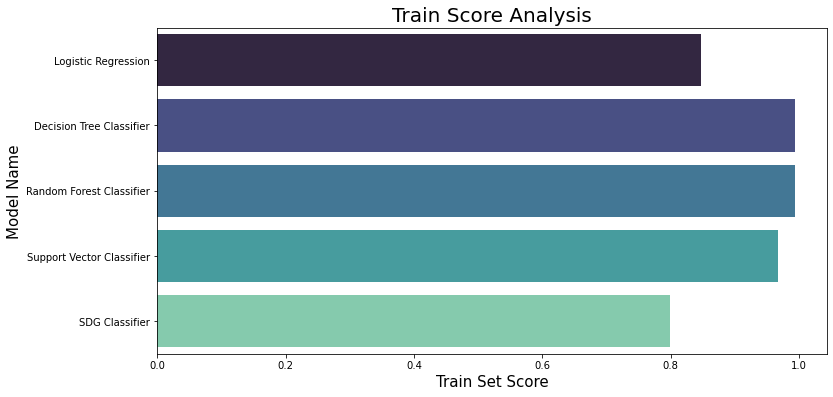

In [92]:
plt.figure(figsize=(12,6))
sns.barplot('Train Score','Model Name',data=all_score,palette = "mako")
plt.xlabel('Train Set Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Train Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Test Score Analysis')

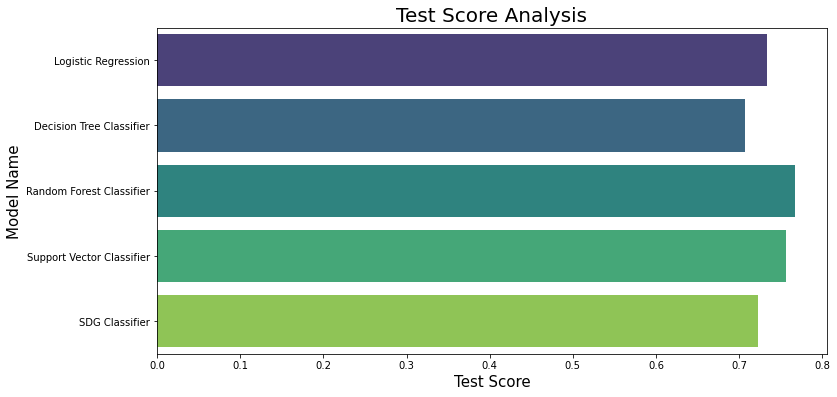

In [93]:
plt.figure(figsize=(12,6))
sns.barplot('Test Score','Model Name',data=all_score,palette = "viridis")
plt.xlabel('Test Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Test Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Accuracy Score Analysis')

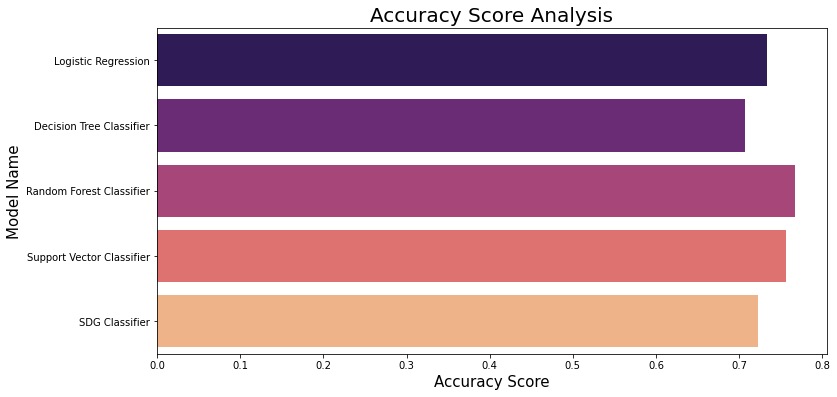

In [94]:
plt.figure(figsize=(12,6))
sns.barplot('Accuracy Score','Model Name',data=all_score,palette = "magma")
plt.xlabel('Accuracy Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Accuracy Score Analysis',fontsize=20)

Text(0.5, 1.0, 'Cross Validation Score Analysis')

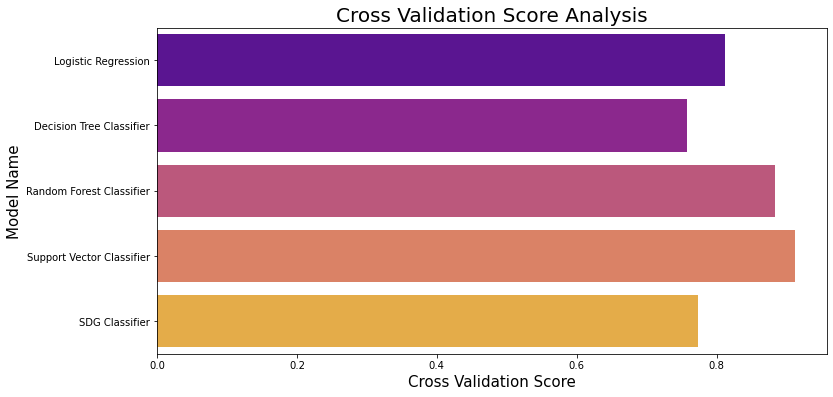

In [95]:
plt.figure(figsize=(12,6))
sns.barplot('Cross Validation Score','Model Name',data=all_score,palette = "plasma")
plt.xlabel('Cross Validation Score',fontsize=15)
plt.ylabel('Model Name',fontsize=15)
plt.title('Cross Validation Score Analysis',fontsize=20)

##### Outcome : Based on Accuracy Score & Cross Validation Score SDG Classifier is best model on this dataset.

### 10. Hyperparameter Tuning Using Grid Search CV

In [97]:
from sklearn.model_selection import GridSearchCV

In [99]:
# let's selects different parameters for tuning
grid_params = {
                'penalty':['l2','l1','elasticnet'],
                'loss':['hinge','squared_hinge'],
                'n_jobs':[-1,1]
                }

In [101]:
# Training the model with the given parameters using GridSearchCV
GCV =  GridSearchCV(sdg, grid_params, cv = 3, verbose=10)
GCV.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 1/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time= 7.9min
[CV 2/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 2/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time= 6.4min
[CV 3/3; 1/12] START loss=hinge, n_jobs=-1, penalty=l2..........................
[CV 3/3; 1/12] END ........loss=hinge, n_jobs=-1, penalty=l2; total time= 5.4min
[CV 1/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 1/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time= 4.7min
[CV 2/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 2/3; 2/12] END ........loss=hinge, n_jobs=-1, penalty=l1; total time= 4.1min
[CV 3/3; 2/12] START loss=hinge, n_jobs=-1, penalty=l1..........................
[CV 3/3; 2/12] END ........loss=hinge, n_jobs=-1

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'loss': ['hinge', 'squared_hinge'], 'n_jobs': [-1, 1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             verbose=10)

In [102]:
# Printing the best parameters found by GridSearchCV
GCV.best_params_

{'loss': 'squared_hinge', 'n_jobs': -1, 'penalty': 'l1'}

### Fit the model using best parameter

In [103]:
sdg = SGDClassifier(loss='squared_hinge',penalty='l1',n_jobs=-1)
sdg.fit(X_train,y_train)
sdg_pred = sdg.predict(X_test)
sdg_accuracy = accuracy_score(y_test,sdg_pred)
sdg_cf = classification_report(y_test,sdg_pred)
sdg_cm = confusion_matrix(y_test,sdg_pred)
sdg_train_score = sdg.score(X_train,y_train)
sdg_test_score = sdg.score(X_test,y_test)

print('SDG Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',sdg_train_score)
print('The Score on test set is    :',sdg_test_score)
print('The Accuracy on test set is :',sdg_accuracy)
print('The Classification report is :\n',sdg_cf)
print('The Confusion matrix is :\n',sdg_cm)
print('\n------------------------------------------------------------------')

SDG Classifier
------------------------------------------------------------------

The Score on train set is   : 0.8392000682729781
The Score on test set is    : 0.6850119514858205
The Accuracy on test set is : 0.6850119514858205
The Classification report is :
               precision    recall  f1-score   support

           1       0.66      0.66      0.66      5022
           2       0.43      0.44      0.44      3359
           3       0.47      0.47      0.47      4274
           4       0.57      0.58      0.58      6147
           5       0.86      0.85      0.86     15085

    accuracy                           0.69     33887
   macro avg       0.60      0.60      0.60     33887
weighted avg       0.69      0.69      0.69     33887

The Confusion matrix is :
 [[ 3319   770   492   261   180]
 [  742  1489   607   333   188]
 [  497   609  2017   722   429]
 [  239   344   719  3560  1285]
 [  204   259   465  1329 12828]]

-------------------------------------------------------

##### Outcome : After hyperparameter tuning i am not able to improve the performance of model. So default parameter give best result.

### 11. Fit the model again with default parameter

In [104]:
sdg = SGDClassifier()
sdg.fit(X_train,y_train)
sdg_pred = sdg.predict(X_test)
sdg_accuracy = accuracy_score(y_test,sdg_pred)
sdg_cf = classification_report(y_test,sdg_pred)
sdg_cm = confusion_matrix(y_test,sdg_pred)
sdg_train_score = sdg.score(X_train,y_train)
sdg_test_score = sdg.score(X_test,y_test)

print('SDG Classifier')
print('------------------------------------------------------------------\n')
print('The Score on train set is   :',sdg_train_score)
print('The Score on test set is    :',sdg_test_score)
print('The Accuracy on test set is :',sdg_accuracy)
print('The Classification report is :\n',sdg_cf)
print('The Confusion matrix is :\n',sdg_cm)
print('\n------------------------------------------------------------------')

SDG Classifier
------------------------------------------------------------------

The Score on train set is   : 0.7996813927687537
The Score on test set is    : 0.7239649423082598
The Accuracy on test set is : 0.7239649423082598
The Classification report is :
               precision    recall  f1-score   support

           1       0.64      0.85      0.73      5022
           2       0.54      0.38      0.45      3359
           3       0.63      0.40      0.49      4274
           4       0.57      0.73      0.64      6147
           5       0.90      0.85      0.87     15085

    accuracy                           0.72     33887
   macro avg       0.66      0.64      0.64     33887
weighted avg       0.73      0.72      0.72     33887

The Confusion matrix is :
 [[ 4277   351   156   157    81]
 [ 1244  1285   377   350   103]
 [  685   510  1726  1108   245]
 [  253   152   298  4494   950]
 [  220    96   174  1844 12751]]

-------------------------------------------------------

In [105]:
import pickle

In [106]:
final_result = 'Rating Prediction.pickle'
pickle.dump(sdg,open(final_result,'wb'))